### Introduction to regression with Neural Netwroks in TensorFlow

There are many definitions for a regression problem. Here we will simplify by predicting numerical variable, based on combination of input variables.


In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


### Creating Data to View and Fit

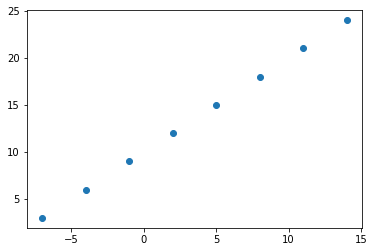

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes


In [5]:
# Demo tensor for housing price prediction problem

house_info = tf.constant(['bedroon', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price # house info -> 3, house price -> 1

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroon', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape,output_shape

((8,), (8,))

In [7]:
# In this case we are using one X value (input/independent variable) to predict one y value (output/dependent variable)

X[0], y[0]

(-7.0, 3.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
# convert np array to tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with TensorFlow

1. **Creating a model** - define input and output layers, and hidden layers 
2. **Compile the model** - define loss function (how wrong we are) and optimizer (how to improve). 
3. **Fitting a model** - letting the model find the best pattern between X & y (features and labels)

In [11]:
# # From the 'tf.keras.sequential' documentation
# # optionally the first laywer can receive an 'input_shape' argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,0)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

In [12]:
print(X)
print(tf.expand_dims(X, axis=-1))

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)
tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float64)


In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# test a prediction
model.predict([17.0])

# note: not very good performance!!

array([[12.716021]], dtype=float32)

### Improving our model
Improve the model by altering steps used to create the model

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compile the model -  you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - here we might fit a model for more epochs. 

In [15]:
# First tweak to improve our model. Train longer!
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] -

In [16]:
# Try to predict 17 again:

model.predict([17.0])

# closer but not right!

array([[30.158512]], dtype=float32)

In [17]:
# let's see if we can make another change to improve the model

# 1. Create the model (extra hiddn unit)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = 'mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 21ms

In [18]:
# Reminder of data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# prediction (should be 27, ground truth)
model.predict([17.0])

# Previous model performed better, even though loss and mae may be lower. 
# Potentially overfitting.

array([[31.941307]], dtype=float32)

## Common Way to improve a deep model
* Adding Layers
* Increase number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting for longer (increase Epochs)

In [20]:
# Example of better performing model with the limited data set

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # changed to Adam, updated lr to 0.01
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 28

In [21]:
# test performance
model.predict([17.0]) # this is very good. .138... off, ground truth is 27.

array([[27.13847]], dtype=float32)

### Evaluating a model's performance

Typical workflow

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

In evaluation
> "visualize, visualize, visualize"

* The data - what are we working with? What does it look like?
* The model - What does the model look like?
* Training of the model - how does it perform while it learns?
* Prediction of the model - how do the predictions line up against the ground truth?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Adjust X for modeling purposes
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [23]:
y = X + 10 # this is the formula/pattern we want the model to learn
y

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66],
       [ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

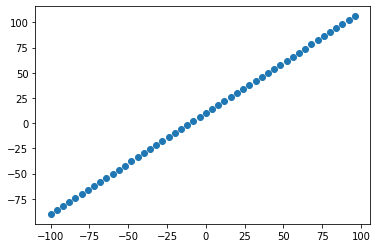

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The three sets of data 
* Training set - model learns from this data (70-80% of available data) [e.g. Class content]
* Validation set - the model gets tuned on this data (typically 10-15% of the data) [e.g. Practice exam] 
* Test set - the model gets evaluated on this data to test what it learned (typically 10-15% of the data) [e.g. midterm]

In [25]:
# split into 80% training 20% test set

# Easy percents
train_test_split = int(np.floor(len(X) * 0.8))

X_train = X[:train_test_split]
y_train = y[:train_test_split]

X_test = X[train_test_split:]
y_test = y[train_test_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

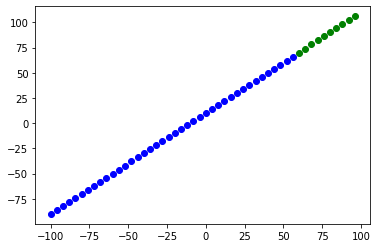

In [26]:
# Vizualize split data

# Training Data
plt.scatter(X_train, y_train, c='b', label='Training Data')
# Test Data
plt.scatter(X_test, y_test, c='g', label='Test Data')

In [28]:
# Building a regressing Neural Network for this expanded dataset

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD,
              metrics=['mae'])

# 3. Train the model
model.fit(X_train, y_train, epochs=100)

ValueError: ignored

### Visualizing the model

In [29]:
from tensorflow.python.eager.monitoring import Metric
# Create a model which builds automatically by defining the input__shape
tf.random.set_seed(42)

# 1. Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'), # input shape is 1 because we are passing one number (1 X -> 1 y)
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_of_many")

# 2. Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "model_of_many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 3. Fit
model.fit(X_train, y_train, epochs=100, verbose=0)

In [31]:
# 4. Evaluate performance
model.predict(X_test)

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

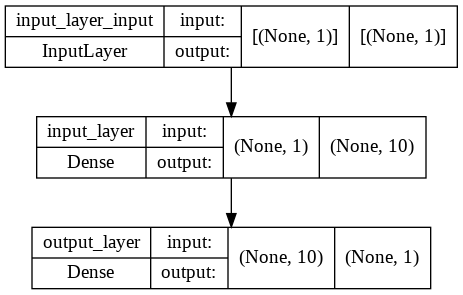

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model predictions!

Plot predictions against ground truth

In [34]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

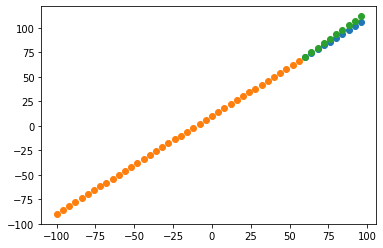

In [35]:
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred)


In [36]:
# because we will do this often, let's make a function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth labels
  """
  # Training Data
  plt.scatter(train_data, train_labels, c='b', label='Training Data')
  # Test Data
  plt.scatter(test_data, test_labels, c='g', label='Test Data')
  # model's predictions
  plt.scatter(test_data, predictions, c='r', label='Model Predictions')
  # show legend 
  plt.legend();

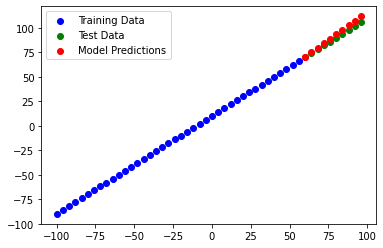

In [37]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Evaluation metrics vary depending on the problem being solved.

For regression:
* MAE - mean absolute error
* MSE - mean square error


In [38]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 153ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [39]:
# Calculate the mean absolute error
mae = tf.keras.losses.mae(y_test, y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.5521774, 1.1399078, 1.7276306, 2.3153534, 2.9030762, 3.4908066,
       4.0785294, 4.666252 , 5.253975 , 5.8416977], dtype=float32)>

In [40]:
# why are there 10 values in output?

y_pred.shape, y_test.shape # different shapes

((10, 1), TensorShape([10, 1]))

In [41]:
# align dimensions
mae = tf.keras.losses.mae(y_true=y_test, 
                          y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.196941, 17.886505, 15.258524, 13.312998, 12.049927, 11.469312,
       11.57115 , 12.37115 , 13.955444, 16.222195], dtype=float32)>

In [42]:
# Calculate the mean square error
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))

mse
# better when larger differences are worse than smaller differences

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([622.9498 , 469.37433, 347.79877, 258.22324, 200.6477 , 175.07219,
       181.49666, 219.92114, 290.3456 , 392.77008], dtype=float32)>

In [43]:
# Function for mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [44]:
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))

tf.Tensor(
[21.196941 17.886505 15.258524 13.312998 12.049927 11.469312 11.57115
 12.37115  13.955444 16.222195], shape=(10,), dtype=float32)
tf.Tensor(
[622.9498  469.37433 347.79877 258.22324 200.6477  175.07219 181.49666
 219.92114 290.3456  392.77008], shape=(10,), dtype=float32)


### Running experiments to improve our model

``` 
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it... etc.
```

1. Get more data 
2. Make model larger (use more 'complex' model) - more layers or more hidden units per layer
3. Train for longer - more epoches, but need to control for overfitting.

# can't do 1) in this case, but can do 2) and 3)

Let's do 3 experiments
1. `mode_1` same as original model, 1 layer, but trained for 100 epochs
2. `model_2` two layers, trained for 100 epochs
3. `model_3` two layers, trained for 500 epochs

**Build `model_1`**


In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
                               ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step -

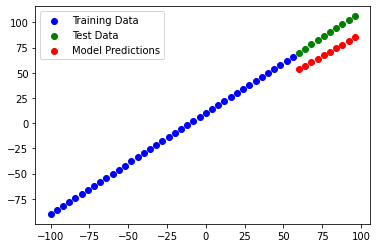

In [82]:
# Make and plot predictions with model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [83]:
tf.squeeze(y_preds_1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
       74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>

In [84]:
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 8.713101 ,  9.3136425, 10.823581 , 13.332979 , 16.745327 ,
        20.745327 , 24.745327 , 28.745327 , 32.745327 , 36.745327 ],
       dtype=float32)>, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 100.76744,  122.73006,  176.69267,  262.6553 ,  380.61792,
         530.5805 ,  712.54315,  926.50574, 1172.4685 , 1450.4309 ],
       dtype=float32)>)

**Build `model_2`**
* 2 Dense layers, trained for 100 epochs

In [85]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
                               ])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 5ms

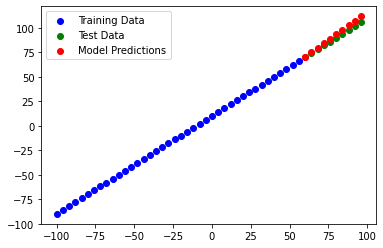

In [86]:
# Make and plot predictions with model_1

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [87]:
# Calculate model_2 evaluation metrics
mse_2 = mse(y_test, y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([21.196941, 17.886505, 15.258524, 13.312998, 12.049927, 11.469312,
        11.57115 , 12.37115 , 13.955444, 16.222195], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([622.9498 , 469.37433, 347.79877, 258.22324, 200.6477 , 175.07219,
        181.49666, 219.92114, 290.3456 , 392.77008], dtype=float32)>)

**Build `model_2`**
* 2 Dense layers, trained for **500** epochs

In [88]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
                               ])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

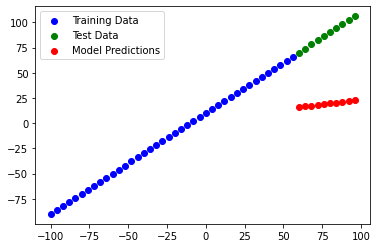

In [89]:
# Make and plot predictions with model_1

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [90]:
# Calculate model_3 evaluation metrics
mse_3 = mse(y_test, y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([50.713615, 54.713615, 58.713615, 62.713615, 66.713615, 70.713615,
        74.713615, 78.713615, 82.713615, 86.713615], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2576.6685, 2998.3774, 3452.0864, 3937.7954, 4455.504 , 5005.213 ,
        5586.9224, 6200.6304, 6846.34  , 7524.0483], dtype=float32)>)

# Comparing the results of our experiments


In [91]:
# Let's compare using pandas DataFrame
import pandas as pd

model_results = [["model_1", np.mean(mae_1.numpy()), np.mean(mse_1.numpy())],
                 ["model_2", np.mean(mae_2.numpy()), np.mean(mse_2.numpy())],
                 ["model_3", np.mean(mae_3.numpy()), np.mean(mse_3.numpy())]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,20.265528,583.599243
1,model_2,14.529414,315.859955
2,model_3,68.713615,4858.358398


In [93]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                20        
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking experiments

One really good habit is to track results of your experiments.

And when doing so, it can be tredious if you're running lots of experiments. 

Luckily, there are tools to help!

📖 **Resources**:
* TensorBoard - component of TensorFlow library to help track experiments
* Weights & Biases - a tool for tracking all kinds of ML experiments (plugs into TensorBoard!)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web or mobile application.

In [18]:
# Format 1: SaveModel (default)
model_2.save("test_best_model_SavedModel_format")
# Format 2: HDF5
model_2.save("test_best_model_HDF5_format", save_format='HDF5')

NameError: ignored

In [ ]:
# Load in SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/test_best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
loaded_HDF5_format = tf.keras.models.load_model("/content/test_best_model_HDF5_format")
loaded_HDF5_format.summary()

### Larger Data Example

In [ ]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

In [ ]:
# Creat X, y values (Features and labels)

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

In [ ]:
# Build a neural network like model_2 above

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
# Check resaults of insurance_model on test data
insurance_model.evaluate(X_test, y_test)


In [ ]:
# MAE is kind of high... how do we improve?

y_train.mean(), y_train.median()

Experiments to try and improve the model
1. Add extra layer with more hidden units
2. Train for longer
3. ???

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100)

In [ ]:
# Evaluate
# Check results of insurance_model on test data
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate
# Check results of insurance_model on test data
insurance_model_3.evaluate(X_test, y_test)

In [ ]:
# Plot history (also known as loss/training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)

In terms of scaling values, NNs tend to prefer normalization.

* Scale (normalization) : Converts distribution to be between 0 & 1 while maintaining the original distribution : MinMaxScalar
* Standardization : Remove mean and divide each value by std. promotes normal distribution of previously nonnormal data : StandardScalar

To prepare our data we can borrow a few classes from Scikit-Learn.

In [19]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all these columns between (0,1)
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Fit the column transformer to our training data
## When you have column transformer, fit to training data, then use that output to transform your test data.
ct.fit(X_train)

# Transform training and test data with noralization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [22]:
# What did our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

* Data hase been normalized and one hot encoded.
* Now let's try another NN model and compare performance.

In [28]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2_ct = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2_ct.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit model
insurance_model_2_ct.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11925.96

In [30]:
# Evaluate
# Check results of insurance_model on test data
insurance_model_2_ct.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Significant improvement with normalization
~5000 mae to ~3500 mae